In [2]:
import numpy as np
import os
import re
from PIL import Image
import matplotlib.pyplot as plt
import imageio
# from scipy.ndimage import rotate

In [3]:
# Organizando os scans individuais de acordo com seus angulos
SCANSPATH = 'C:/Users/arthur/Mestrado/blender/scans/test3'
SCANS = {int(file.split('.')[0]):file for file in os.listdir(SCANSPATH)}
print(f"Número de angulos: {len(SCANS)}")

Número de angulos: 180


In [4]:
# Visualiza as projeções unidas
def ordered_angles(scans = SCANS):
    b_scan = np.zeros((len(scans), 960))
    i = 0
    for scan in sorted(scans.keys()):
        a_scan = np.asarray(Image.open(os.path.join(SCANSPATH, scans[scan])).convert('L'))
        b_scan[i, :] = a_scan[a_scan.shape[0]//2, :]
        i += 1
    return b_scan

In [19]:
sinogram = ordered_angles()

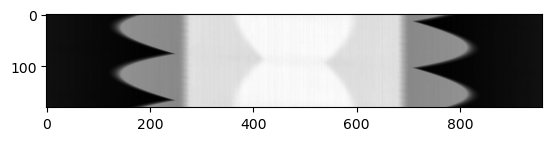

In [14]:
sinogram = np.log(255/sinogram)
plt.imshow(sinogram, cmap = 'gray')

In [37]:
final_image = int(np.ceil(960 * np.sqrt(2)))
b_scan = np.zeros((final_image, final_image))
for scan in range(len(sinogram)):
    a_scan = sinogram[scan]
    a_scan = np.tile(a_scan, (sinogram.shape[1], 1))

    a_scan = Image.fromarray(a_scan).rotate(45, expand=True)
    a_scan = np.asarray(a_scan.rotate(-45+scan))
    b_scan += a_scan
    Image.fromarray(b_scan/np.max(b_scan)*255).convert('L').save(f"./test/{scan}.png")
print(np.unique(b_scan))

[    0.   300.   301. ... 22285. 22288. 22293.]


In [38]:
test_scan = Image.fromarray(a_scan).convert('L')

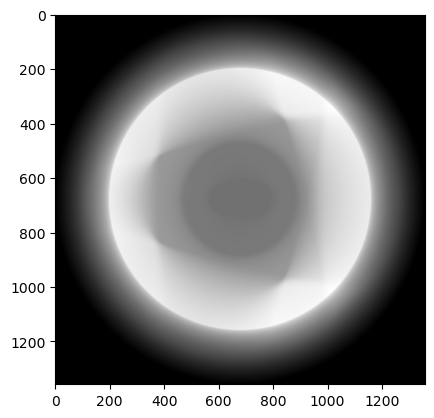

In [41]:
plt.imshow(b_scan/np.max(b_scan)*255, cmap='gray')

In [39]:
np.unique(a_scan)

array([  0.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  73.,  75.,  76.,  77.,
        78.,  79.,  80.,  82.,  83.,  85.,  86.,  87.,  88.,  89.,  90.,
        92.,  93.,  94.,  95.,  97.,  98., 100., 102., 105., 106., 107.,
       108., 111., 112., 114., 116., 117., 118., 120., 121., 123., 124.,
       126., 128., 129., 130., 131., 132., 133., 135., 136., 138., 139.,
       141., 143., 144., 145., 146., 147., 148., 149., 150., 151., 152.,
       153., 154., 155., 156., 157., 158., 159.], dtype=float32)

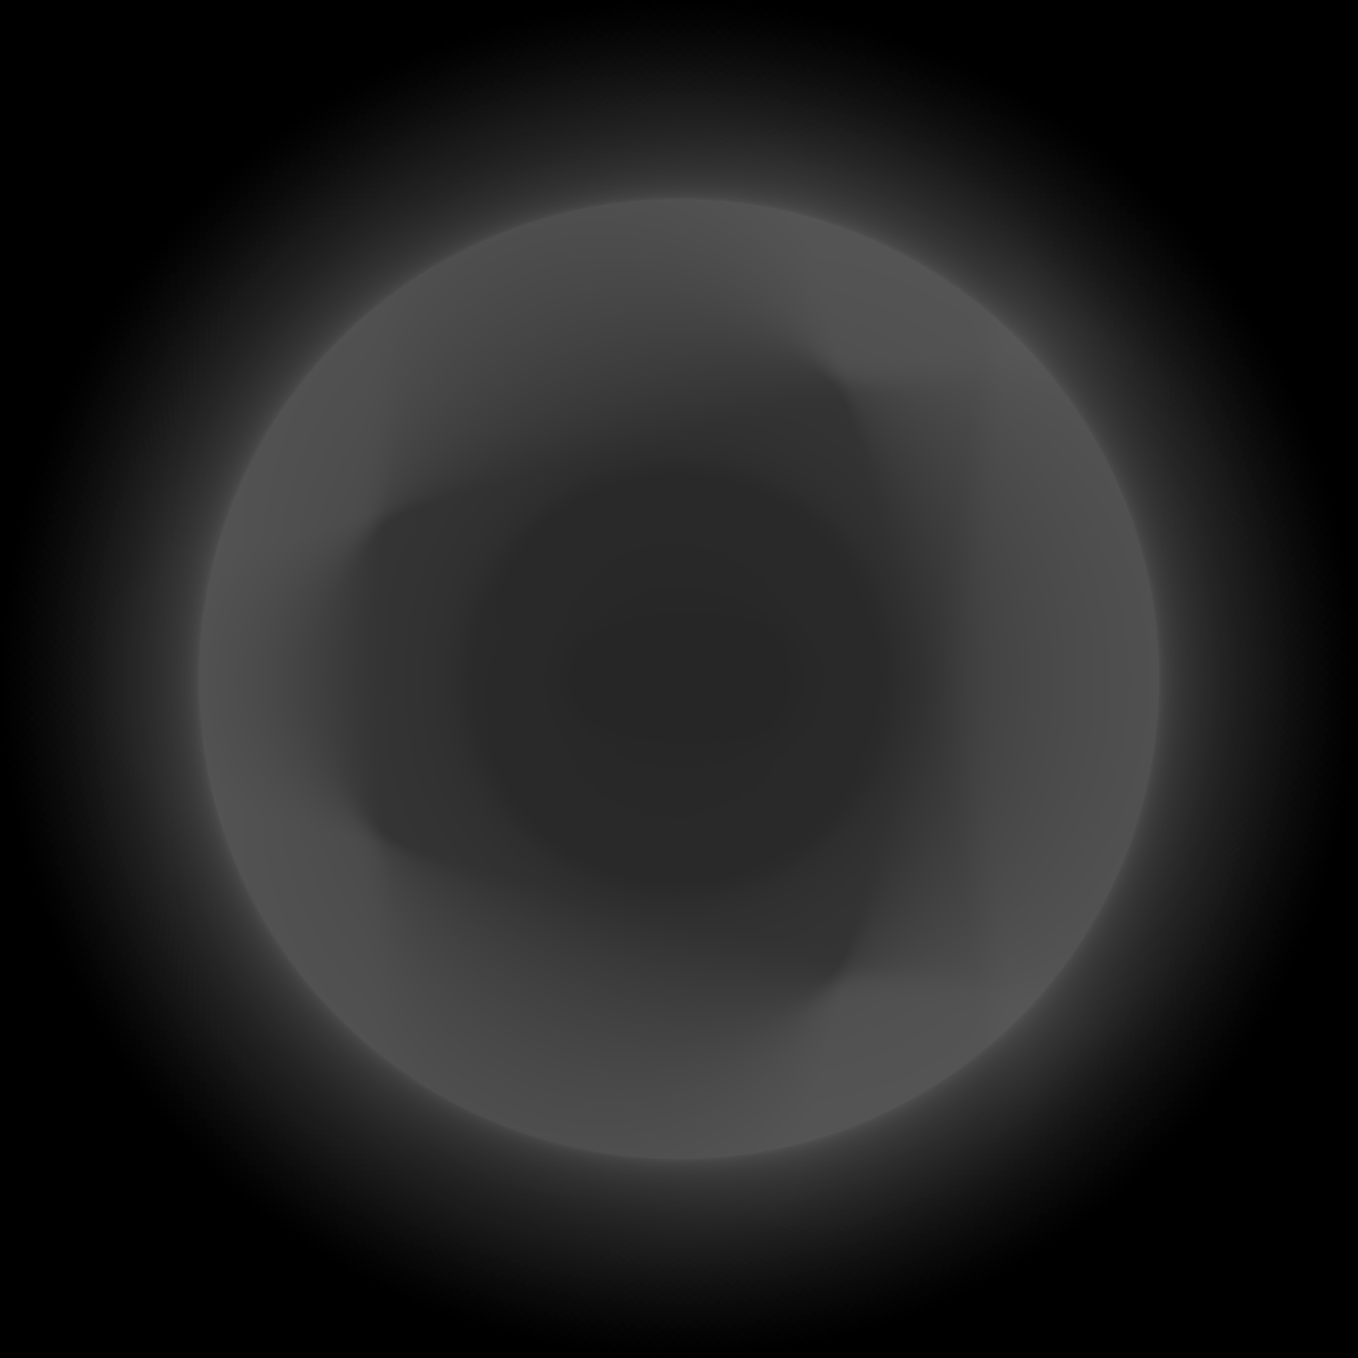

In [40]:
Image.fromarray(b_scan/255).convert('L')

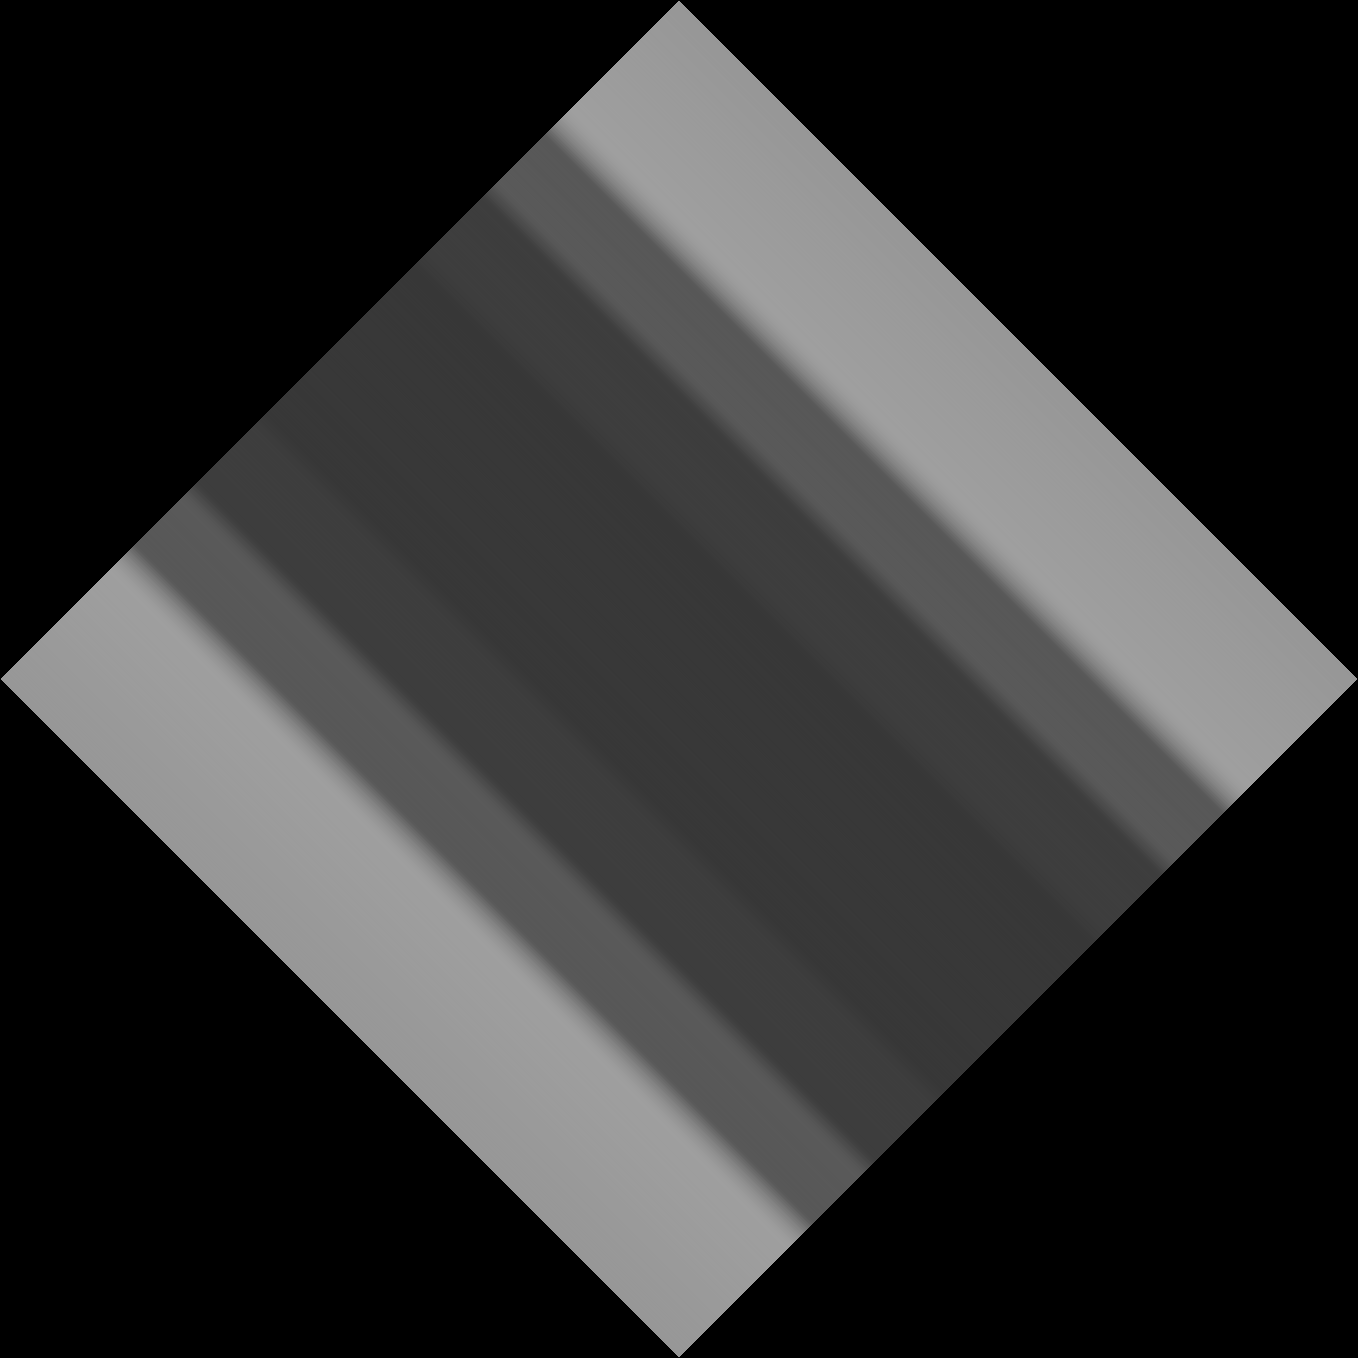

In [27]:
test_scan.rotate(45)

In [17]:
# Definindo uma função de reconstrução geral
# Ela itera sobre cada um dos scans unicos e as soma para criar a imagem final
def reconstruct_from_sinogram(sinogram = sinogram, samples = 180, N = 960, make_gif = False):
    final_image = int(np.ceil(N * np.sqrt(2)))
    b_scan = np.zeros((final_image, final_image))
    for scan in range(len(sinogram)):
        a_scan = sinogram[scan]
        a_scan = np.tile(a_scan, (sinogram.shape[1], 1))

        a_scan = Image.fromarray(a_scan).rotate(45, expand=True)
        a_scan = np.asarray(a_scan.rotate(-45+scan))
        b_scan += a_scan

        Image.fromarray(b_scan/np.max(b_scan)*255).convert('L').save(f"./test/{scan}.png")
    print(np.unique(b_scan))
    return b_scan    

In [43]:
np.unique(np.asarray(test_reconstruct))

array([0, 1], dtype=uint8)

[  0.           1.03476608   1.04136676 ... 277.35982752 277.38115287
 277.41453254]


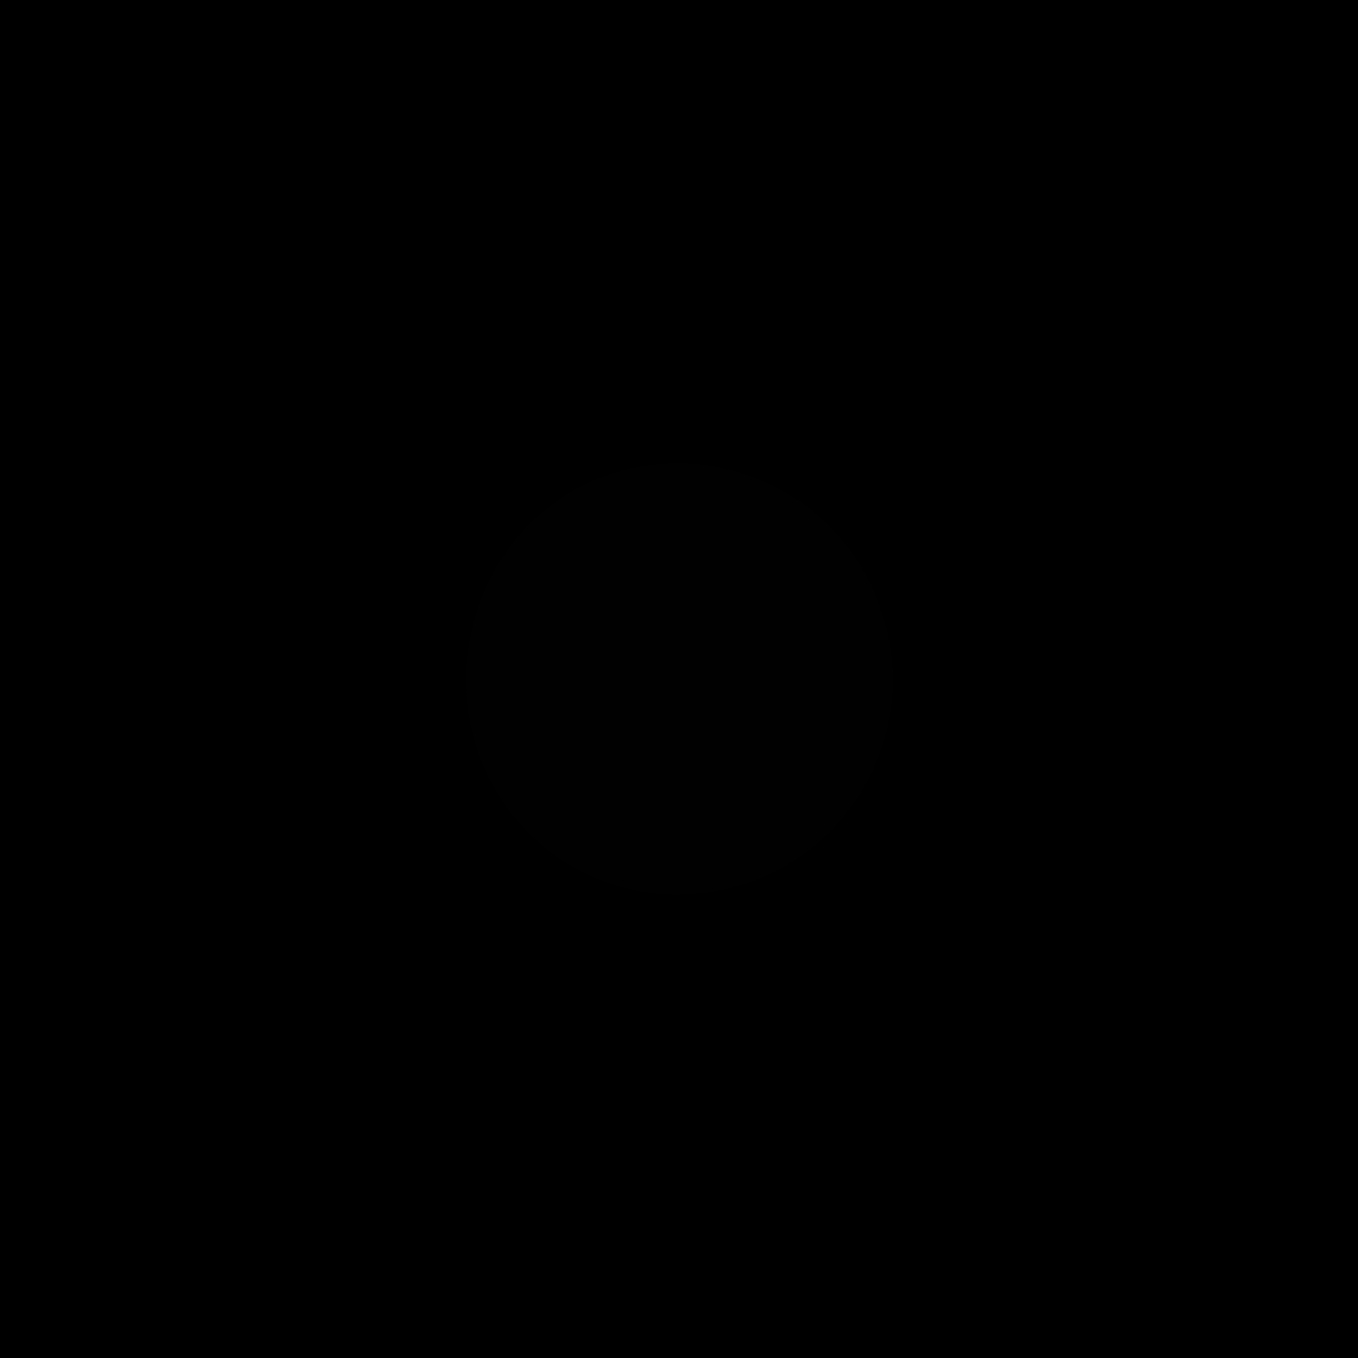

In [42]:
test_reconstruct = Image.fromarray(reconstruct_from_sinogram()/255).convert('L')
test_reconstruct

In [49]:
def filter_signal(signal, D0 = 10):
    F = np.fft.fft(signal)
    # Fshift = np.fft.fftshift(F)
    M = len(F)
    D0 = 10

    # Criando filtro
    H = np.zeros(M, dtype=np.float32)
    for u in range(M):
        D = np.abs(u - M/2)
        H[u] = np.exp(-D**2/(2*D0**2))


    return np.real(np.fft.ifft(F*H))


In [ ]:
# Definindo uma função de reconstrução geral
# Ela itera sobre cada um dos scans unicos e as soma para criar a imagem final
def reconstruct(scans = SCANS, samples = 180, N = 960, make_gif = False):
    final_image = int(np.ceil(N * np.sqrt(2)))
    b_scan = np.zeros((final_image, final_image))
    for scan in sorted(scans.keys()):
        a_scan = np.asarray(Image.open(os.path.join(SCANSPATH, scans[scan])).convert('L'))
        a_scan = np.tile(a_scan[a_scan.shape[0]//2,:], (a_scan.shape[1], 1))

        a_scan = Image.fromarray(a_scan).rotate(45, expand=True)
        a_scan = np.asarray(a_scan.rotate(-45+scan))
        b_scan += a_scan

        Image.fromarray(b_scan/np.max(b_scan)*255).convert('L').save(f"./test/{scan}.png")
    print(np.unique(b_scan))
    return b_scan    

In [50]:
# Definindo uma função de reconstrução geral
# Ela itera sobre cada um dos scans unicos e as soma para criar a imagem final
def reconstruct2(scans = SCANS, samples = 180, N = 960, make_gif = False):
    final_image = int(np.ceil(N * np.sqrt(2)))
    b_scan = np.zeros((final_image, final_image))
    for scan in sorted(scans.keys()):
        a_scan = np.asarray(Image.open(os.path.join(SCANSPATH, scans[scan])).convert('L'))
        a_scan = a_scan[a_scan.shape[0]//2,:]
        a_scan = filter_signal(a_scan, 50)
        a_scan = np.tile(a_scan, (len(a_scan), 1))

        a_scan = Image.fromarray(a_scan).rotate(45, expand=True)
        a_scan = np.asarray(a_scan.rotate(-45+scan))
        b_scan += a_scan

        Image.fromarray(b_scan/np.max(b_scan)*255).convert('L').save(f"./test/{scan}.png")
    print(np.unique(b_scan))
    return b_scan    

[-21.36322821 -21.10008048 -14.12391036 ...   8.95218631  10.44517418
  11.32944327]


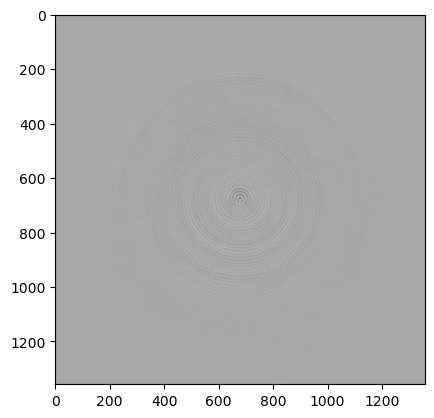

In [51]:
reconstructed = Image.fromarray(reconstruct2())
plt.imshow(reconstructed/np.max(reconstructed), cmap='gray')

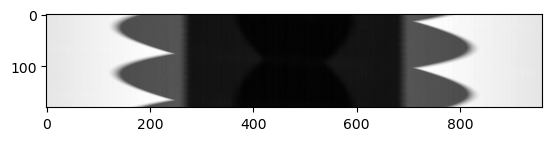

In [13]:
plt.imshow(b, cmap='gray')

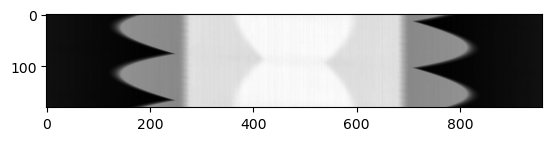

In [15]:
# Fazendo o logaritmo entre emissor e receptor
plt.imshow(c, cmap='gray')

In [ ]:
# Reconstrucao utilizando retroprojecao
# Para facilitar a demonstração de métodos diferentes, foi utilizada uma função geral para a reconstrução
# Ela recebe as projeções, as posiciona no angulo correto e as acumula na imagem final
def reconstrucao(projecoes, angulos):
    N = 960
    final_img = np.zeros((N,N))
    for i in range(len(projecoes)):
        temp_matrix = np.zeros((N,N))
        temp_matrix[N / 2, :] = projecoes[i, :]
        temp_matrix = np.asarray(Image.fromarray(temp_matrix).rotate(i))
        final_img += temp_matrix
    
    return final_img
        


In [22]:
# Filter Sinogram

In [ ]:
# Reconstrucao utilizando retroprojecao filtrada
# 1: Passar as projeções para o dominio da frequencia pela transformada de fourier
PROJECAO = np.fft.fft(-np.log(c/255.0), axis = 0)  # FFT-1D (coluna por coluna) das projecões
# 2: Criar o filtro que ira filtrar as frequências mais altas
# 3: Efetuar a multiplicacao de ambas para realizar a filtragem
# 4: Retornar para o dominio espacial e fazer a reconstrucao 

In [ ]:
'''
# Codigo para gerar gif

import imageio
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('/path/to/movie.gif', images)



'''